Segment customers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [3]:
df = pd.read_csv('Test.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
df.fillna(df.mode().iloc[0], inplace=True)

In [5]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [6]:
categorical_col = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
label_encoders = {}
for columns in categorical_col:
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])
    label_encoders[columns] = le
    
# converts text categories into numerical values without..
# ..creating extra columns unlike the pd.get_dummies method in pandas

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,2,1.0,5
1,458994,1,1,37,1,5,8.0,0,4.0,5
2,458996,0,1,69,0,0,0.0,2,1.0,5
3,459000,1,1,59,0,4,11.0,1,2.0,5
4,459001,0,0,19,0,8,1.0,2,4.0,5


In [8]:
# selecting the relevant features
imp_features = df[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score', 'Profession']]
imp_features.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Spending_Score',
       'Profession'],
      dtype='object')

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imp_features)

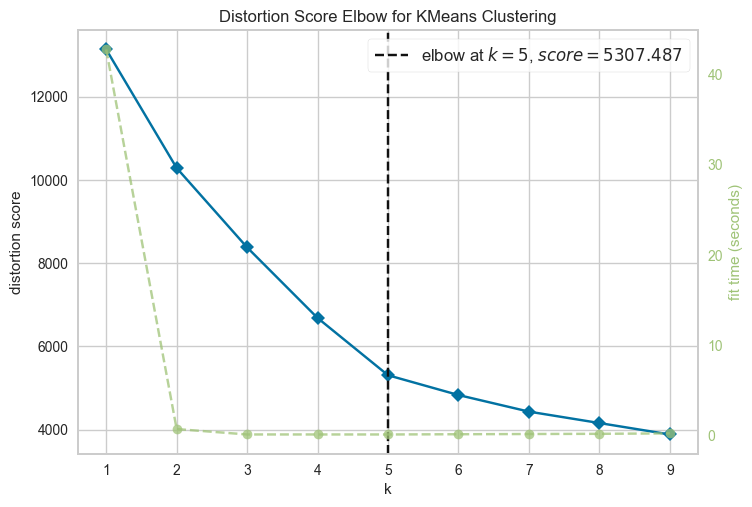

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# using Elbow method to find the optimal k / number of clusters
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_features)
visualizer.show()

In [11]:
# Train the k-means model with optimal  k
# where k = 5
kmeans = KMeans(n_clusters=5, n_init=10) #random_state=42
df['Cluster'] = kmeans.fit_predict(scaled_features)

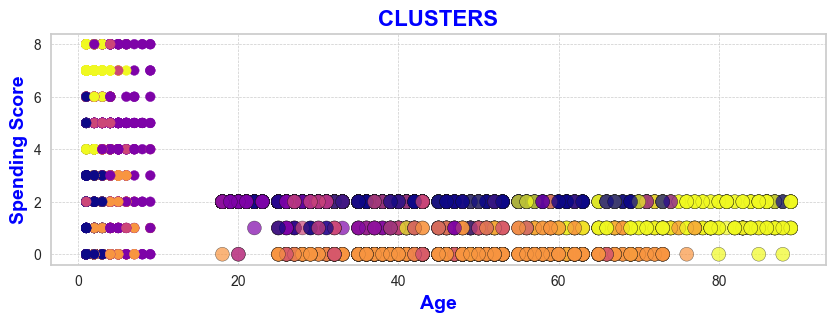

In [15]:
plt.figure(figsize=(10, 3))  # Changed the figure size for better visibility
plt.scatter(df['Age'], df['Spending_Score'], c=df['Cluster'], cmap='plasma', edgecolor='k', s=100, alpha=0.7)
plt.xlabel('Age', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('Spending Score', fontsize=14, fontweight='bold',color='blue')
plt.title('CLUSTERS', fontsize=16, fontweight='bold', color='blue')
plt.grid(True, linestyle='--', linewidth=0.5)
# plt.gca().set_facecolor('grey')
scatter = plt.scatter(df["Family_Size"], df['Profession'], c=df['Cluster'], cmap='plasma')
handles, labels = scatter.legend_elements()


plt.show()

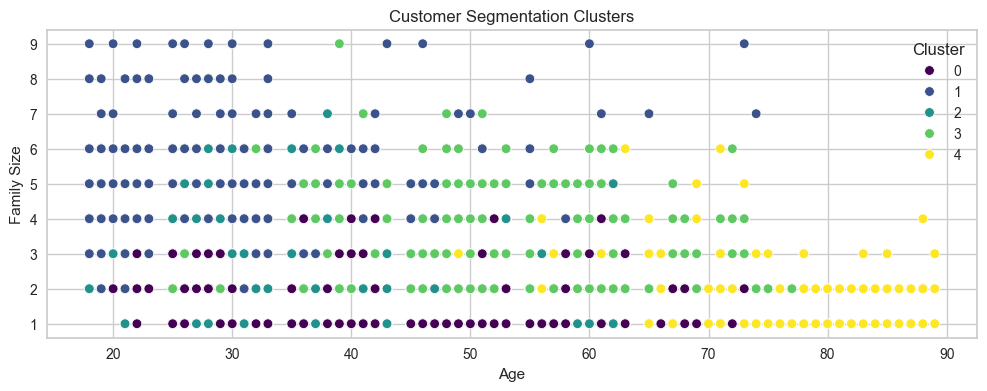

In [13]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x=df["Age"], y=df["Family_Size"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segmentation Clusters")
plt.xlabel("Age")
plt.ylabel("Family Size")
plt.show()

In [14]:
# Cluster characteristics
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

                    ID    Gender  Ever_Married        Age  Graduated  \
Cluster                                                                
0        463407.468847  0.496885      0.468847  42.498442   0.763240   
1        463517.064298  0.605753      0.221658  28.297800   0.297800   
2        463340.875587  0.467136      0.471831  36.631455   0.685446   
3        463571.238462  0.573846      1.000000  49.426154   0.753846   
4        463176.751572  0.550314      0.902516  72.100629   0.559748   

         Profession  Work_Experience  Spending_Score  Family_Size     Var_1  
Cluster                                                                      
0          1.228972         1.032710        1.965732     1.730530  4.207165  
1          4.340102         1.338409        1.905245     4.353638  3.742809  
2          2.633803         8.603286        1.582160     2.354460  4.255869  
3          1.200000         1.332308        0.161538     3.110769  4.136923  
4          6.547170        